![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [2]:
# Re-run this cell 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")


best_math_schools = schools.loc[schools["average_math"] >= 640, ["school_name", "average_math"]].sort_values(by="average_math", ascending=False)
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

top_10_schools = schools.loc[:, ["school_name", "total_SAT"]].sort_values(by="total_SAT", ascending=False).head(10)

# Fixing the error
borough_stats = schools.groupby('borough').agg(
    num_schools=('total_SAT', 'size'),
    average_SAT=('total_SAT', 'mean'),
    std_SAT=('total_SAT', 'std')
).reset_index()

# Find the borough with the largest standard deviation
max_std_borough = borough_stats.loc[borough_stats['std_SAT'].idxmax()]

# Create the resulting DataFrame
largest_std_dev = pd.DataFrame({
    'borough': [max_std_borough['borough']],
    'num_schools': [max_std_borough['num_schools']],
    'average_SAT': [round(max_std_borough['average_SAT'], 2)],
    'std_SAT': [round(max_std_borough['std_SAT'], 2)]
})
# Preview the data
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
...,...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6,1086
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5,1114
372,Channel View School for Research,Queens,Q410,427,430,423,76.6,1280
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5,1207


**Visualization: Schools with High Math Scores**

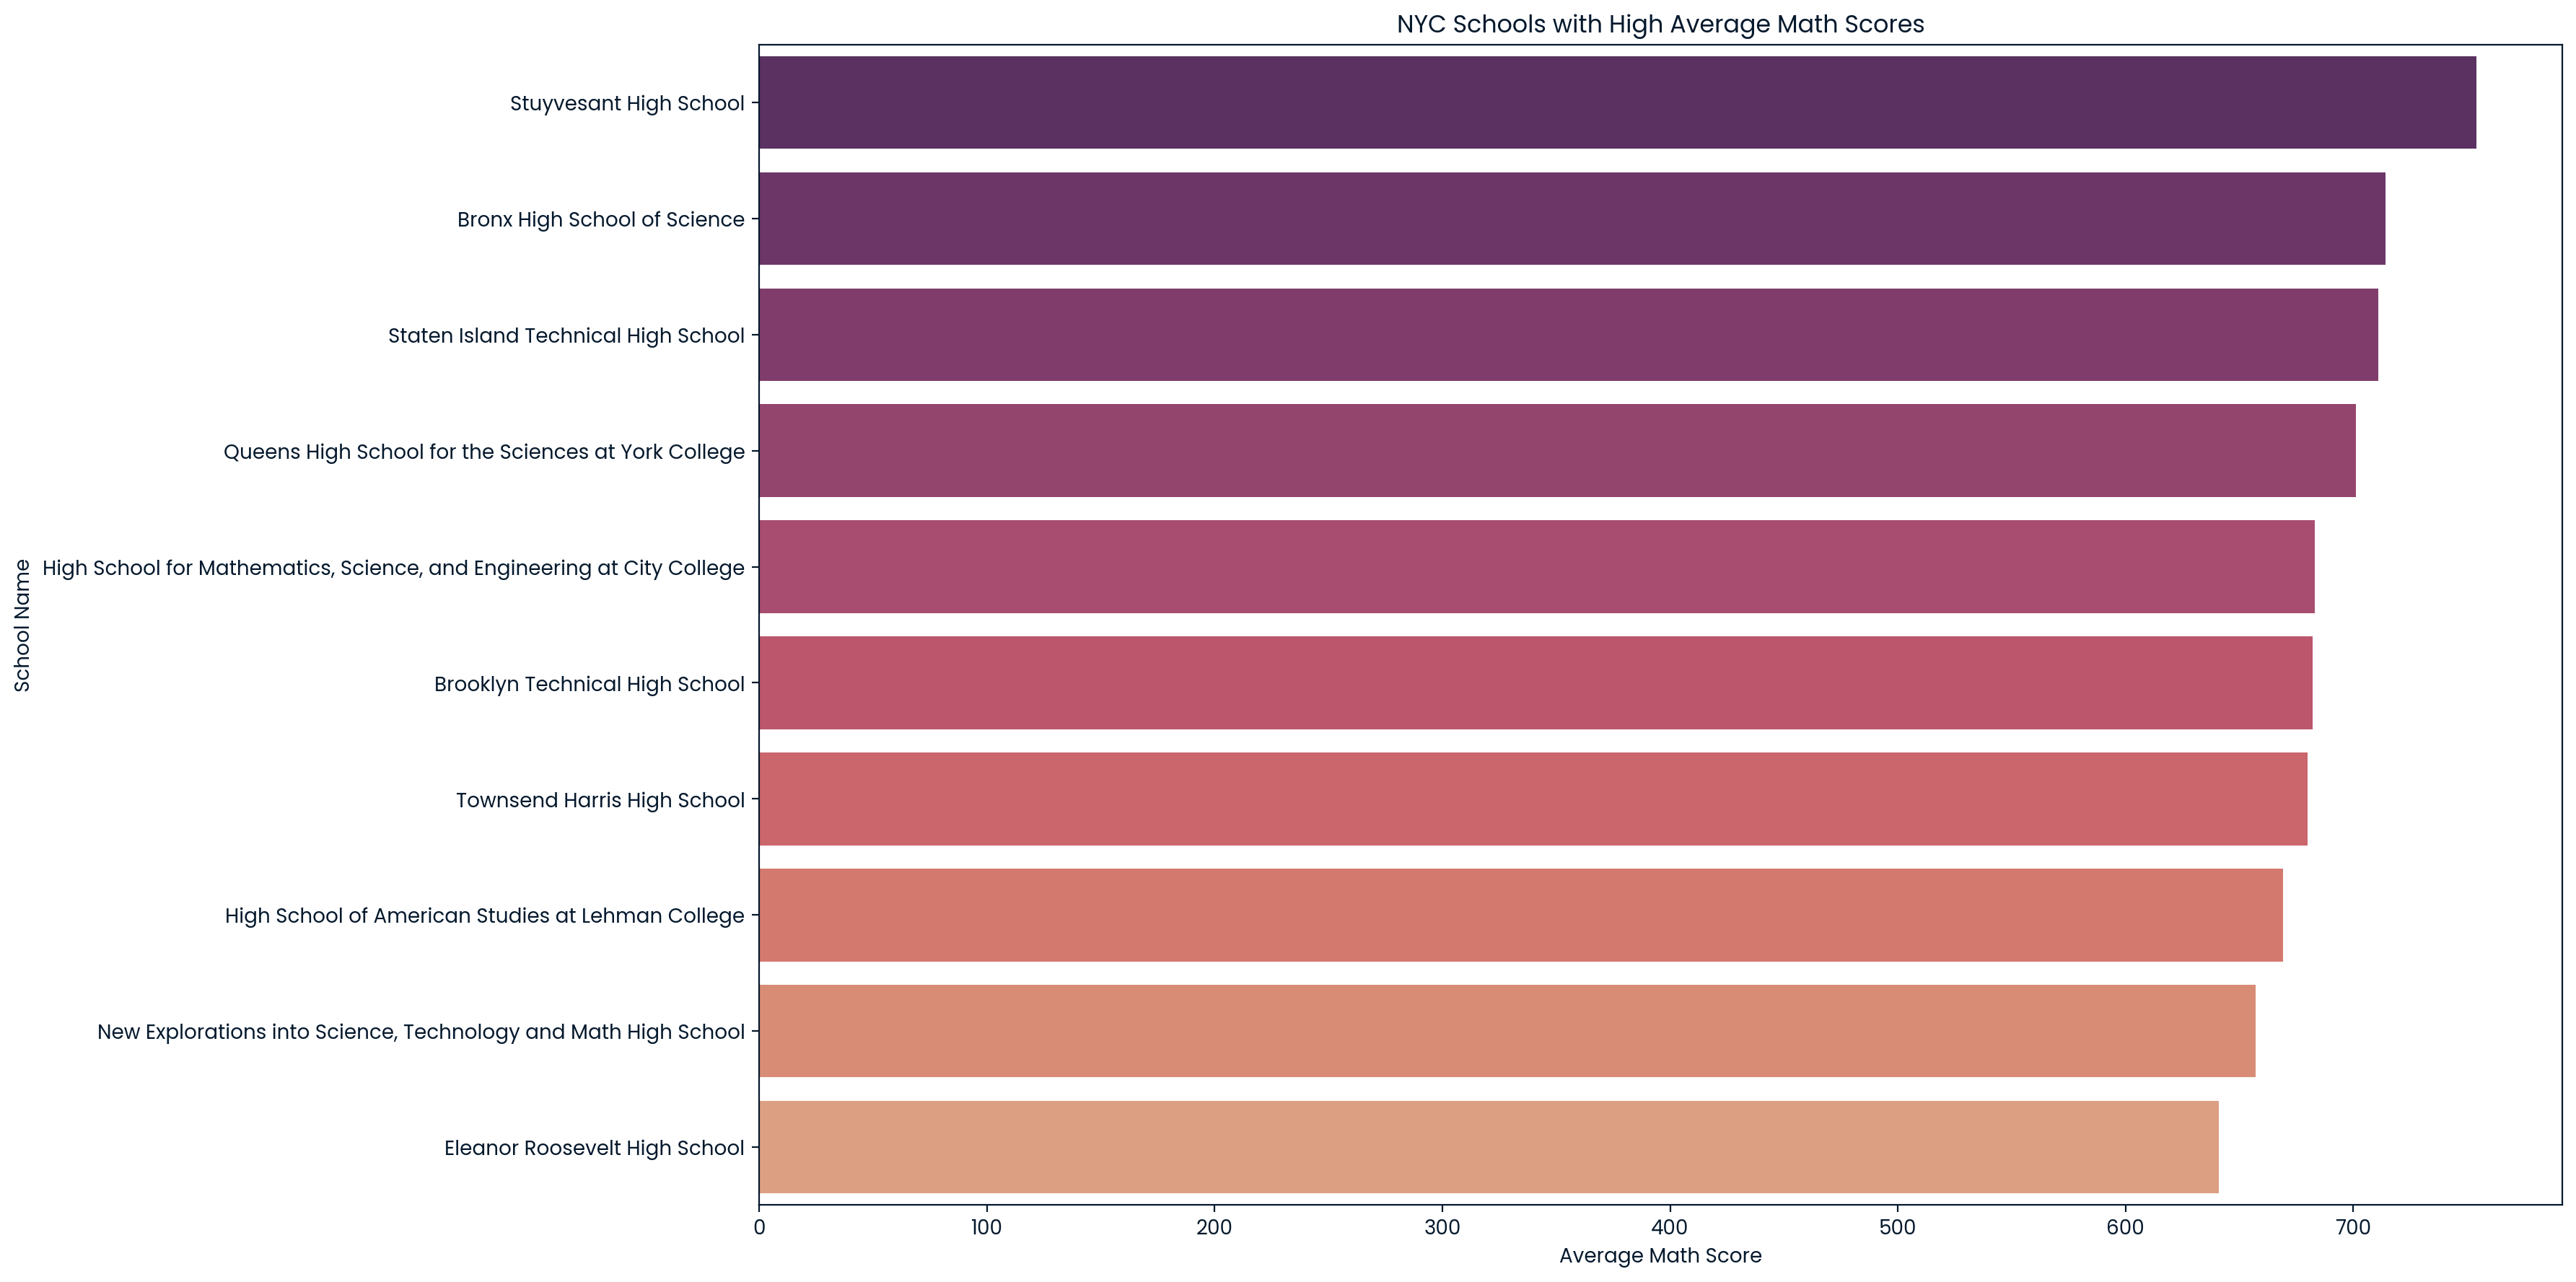

In [9]:
plt.figure(figsize=(18, 9))
sns.barplot(x='average_math', y='school_name', data=best_math_schools, palette='flare_r')
plt.title('NYC Schools with High Average Math Scores')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.tight_layout()
plt.show()

**Visualization: Histogram of Total SAT Scores**

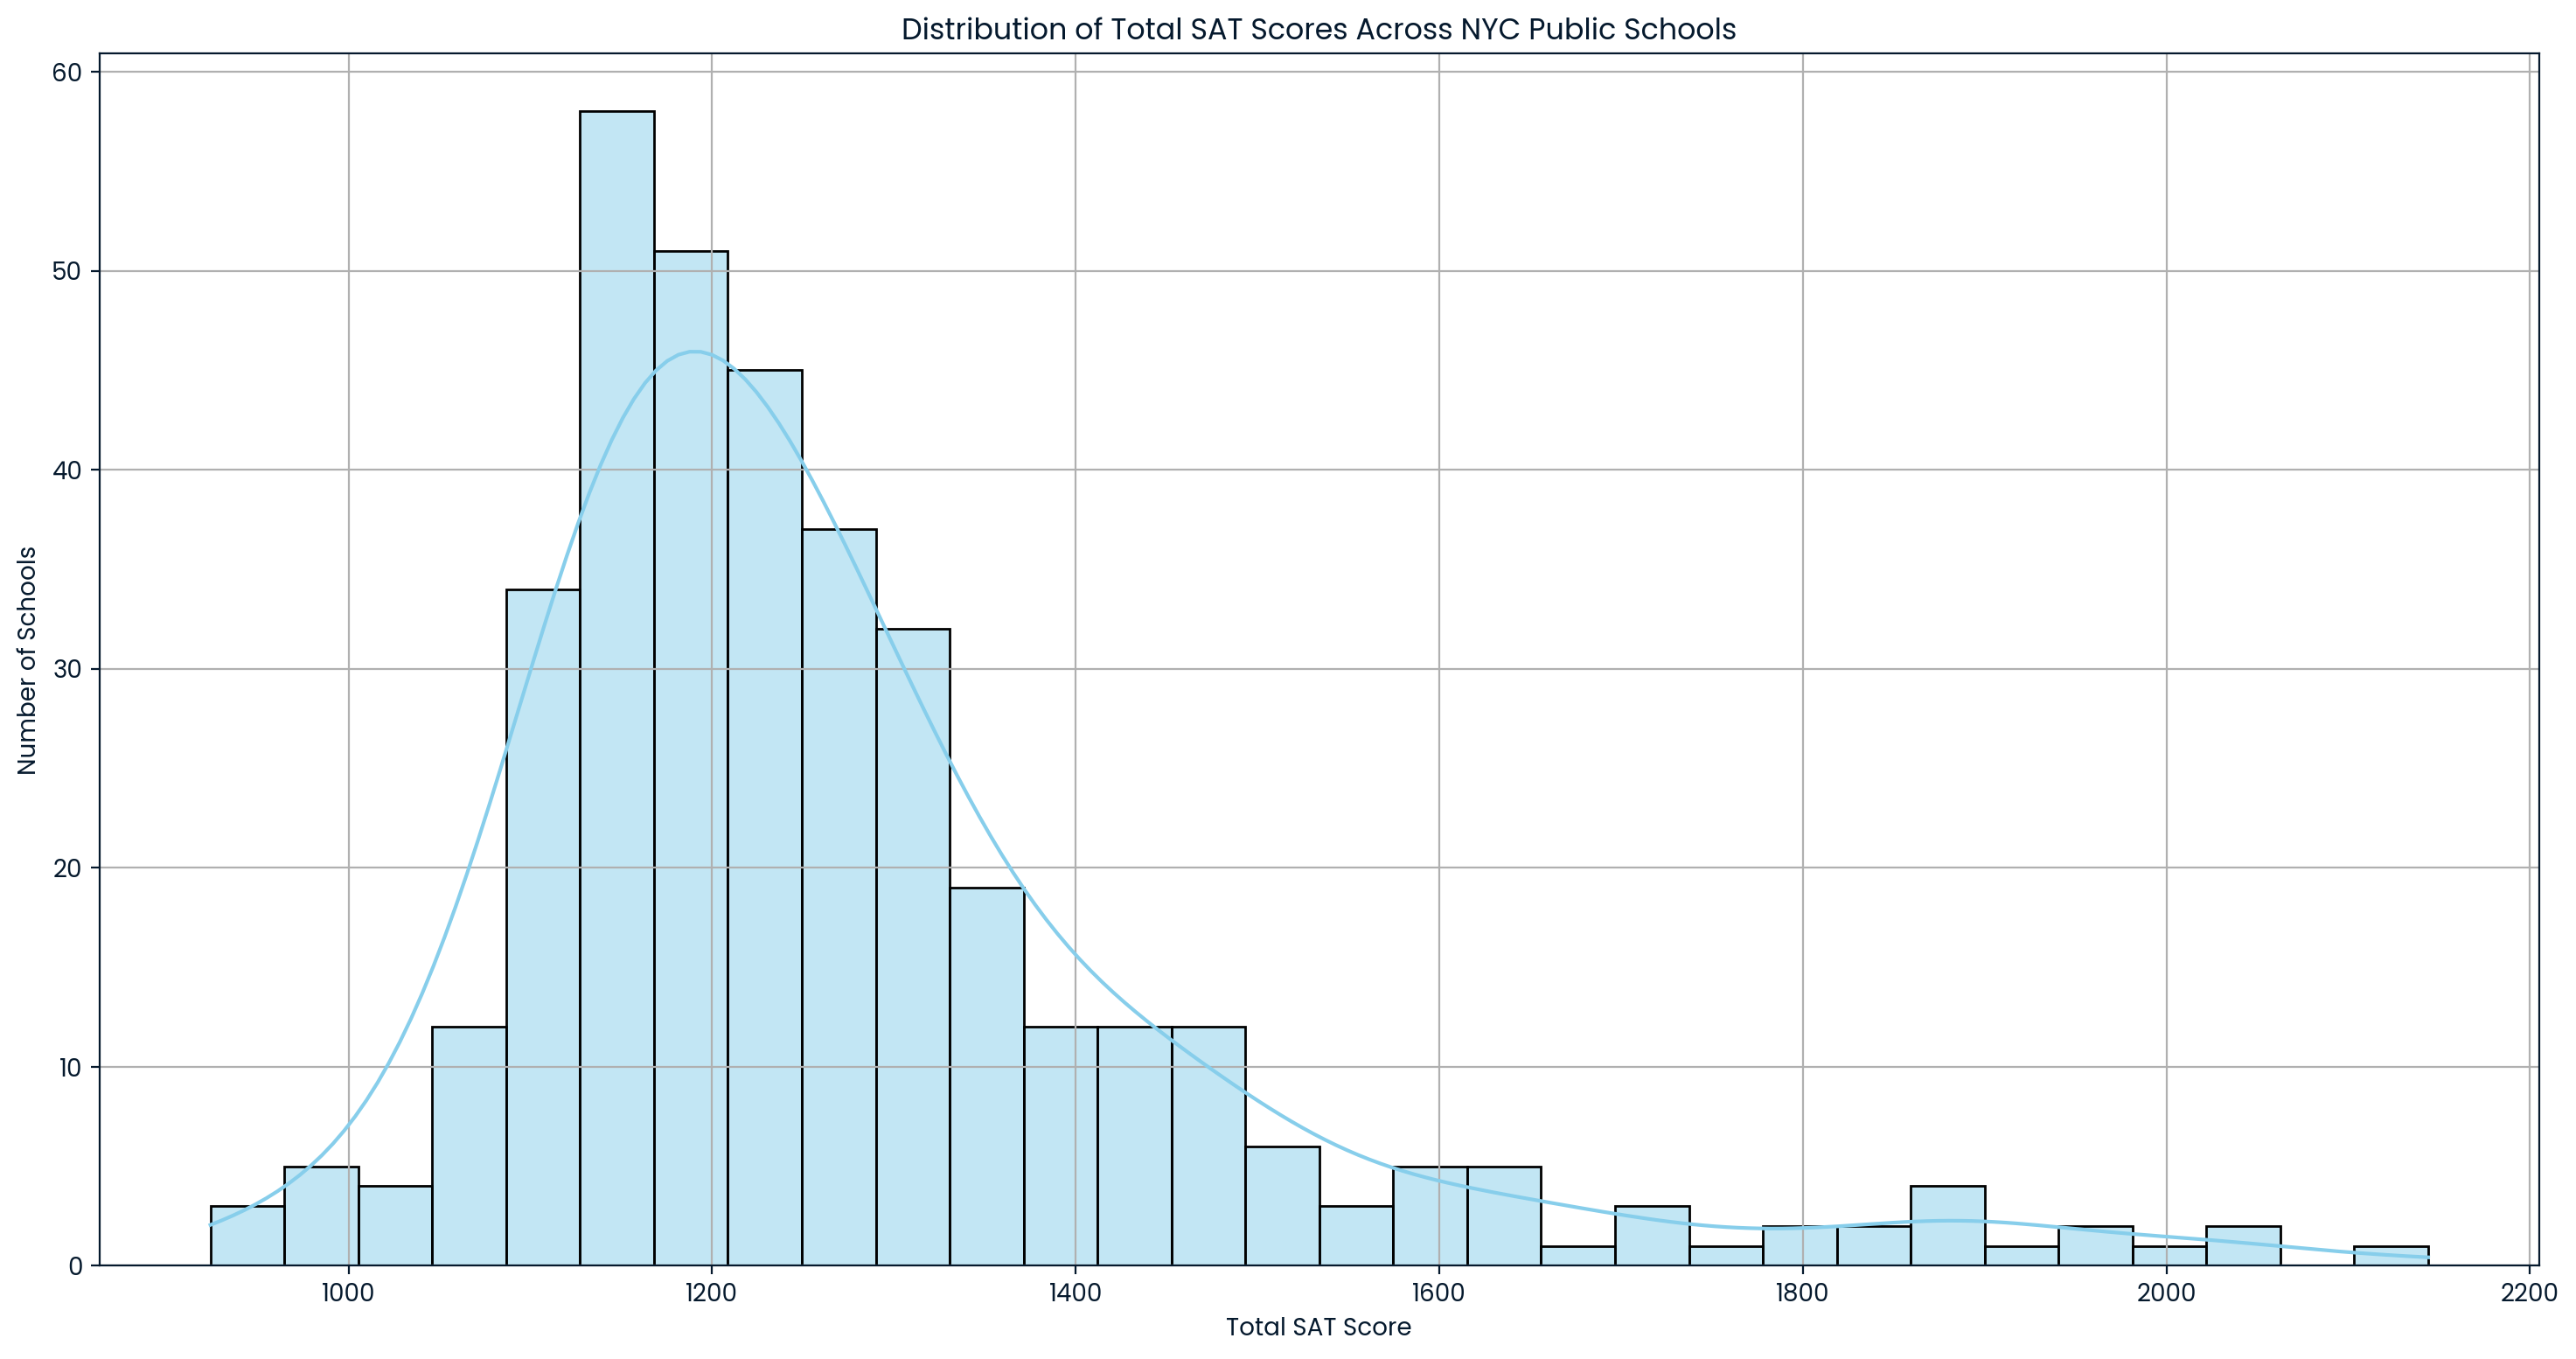

In [4]:
plt.figure(figsize=(18, 9))
sns.histplot(schools['total_SAT'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total SAT Scores Across NYC Public Schools')
plt.xlabel('Total SAT Score')
plt.ylabel('Number of Schools')
plt.grid(True)
plt.show()


**Visualization: Top 10 Schools by Total SAT Score**

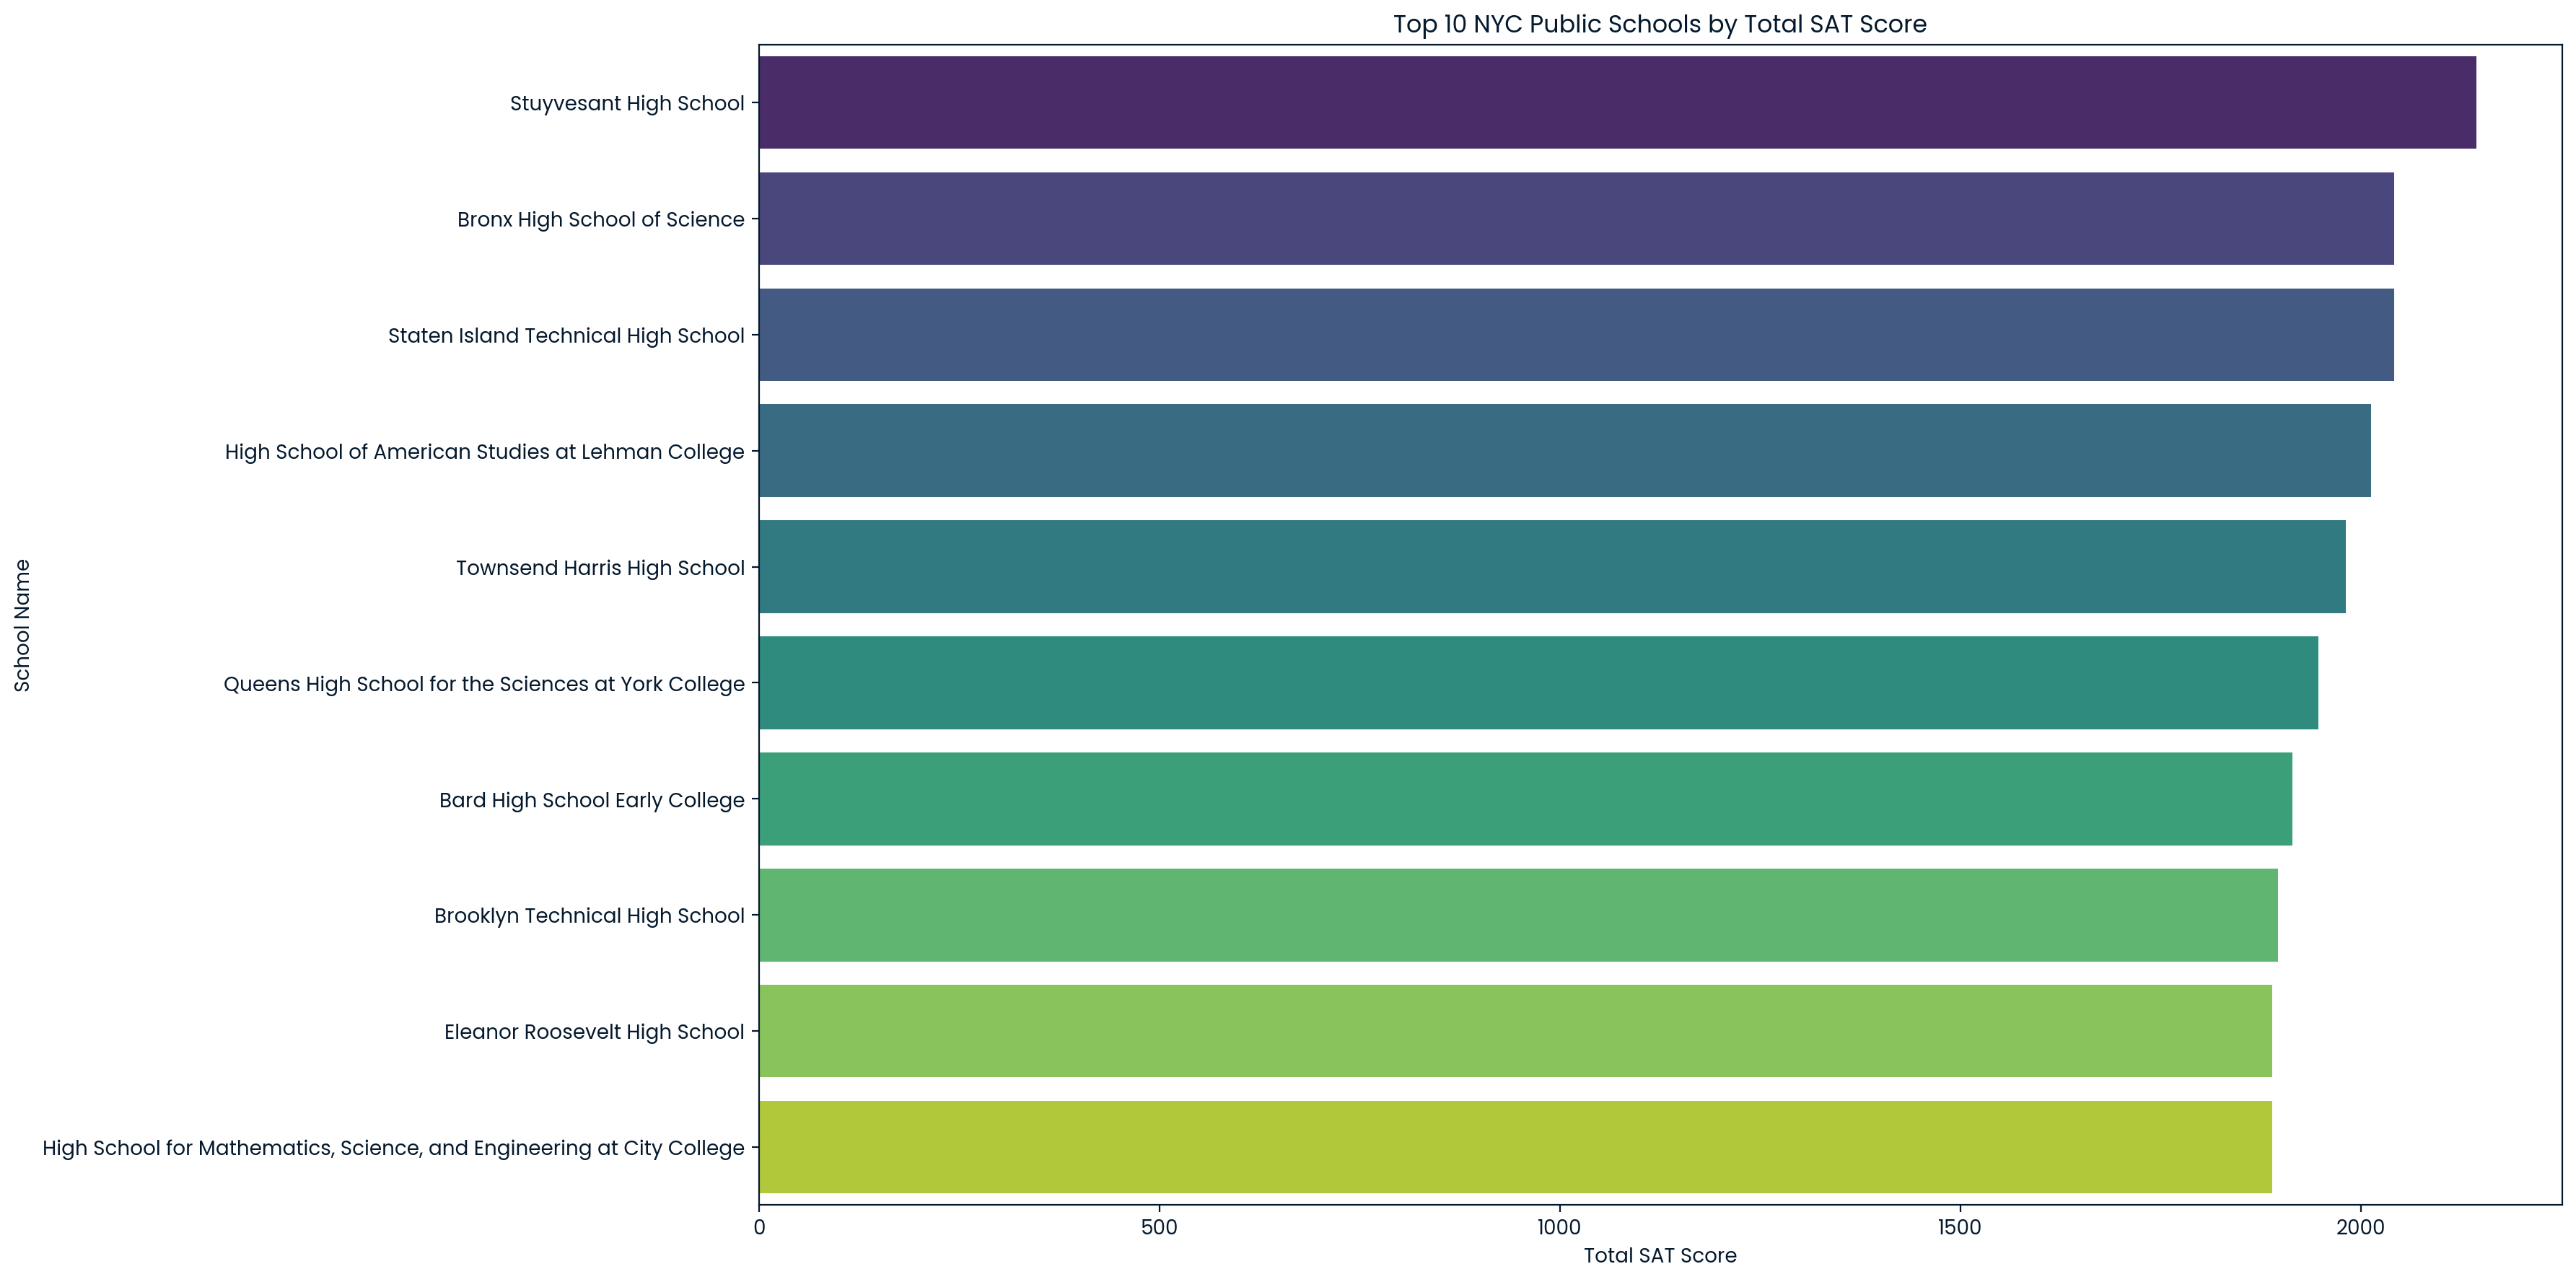

In [5]:
plt.figure(figsize=(18, 9))
sns.barplot(x='total_SAT', y='school_name', data=top_10_schools, palette='viridis')
plt.title('Top 10 NYC Public Schools by Total SAT Score')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.tight_layout()
plt.show()

**Visualization: Average SAT Score by Borough**

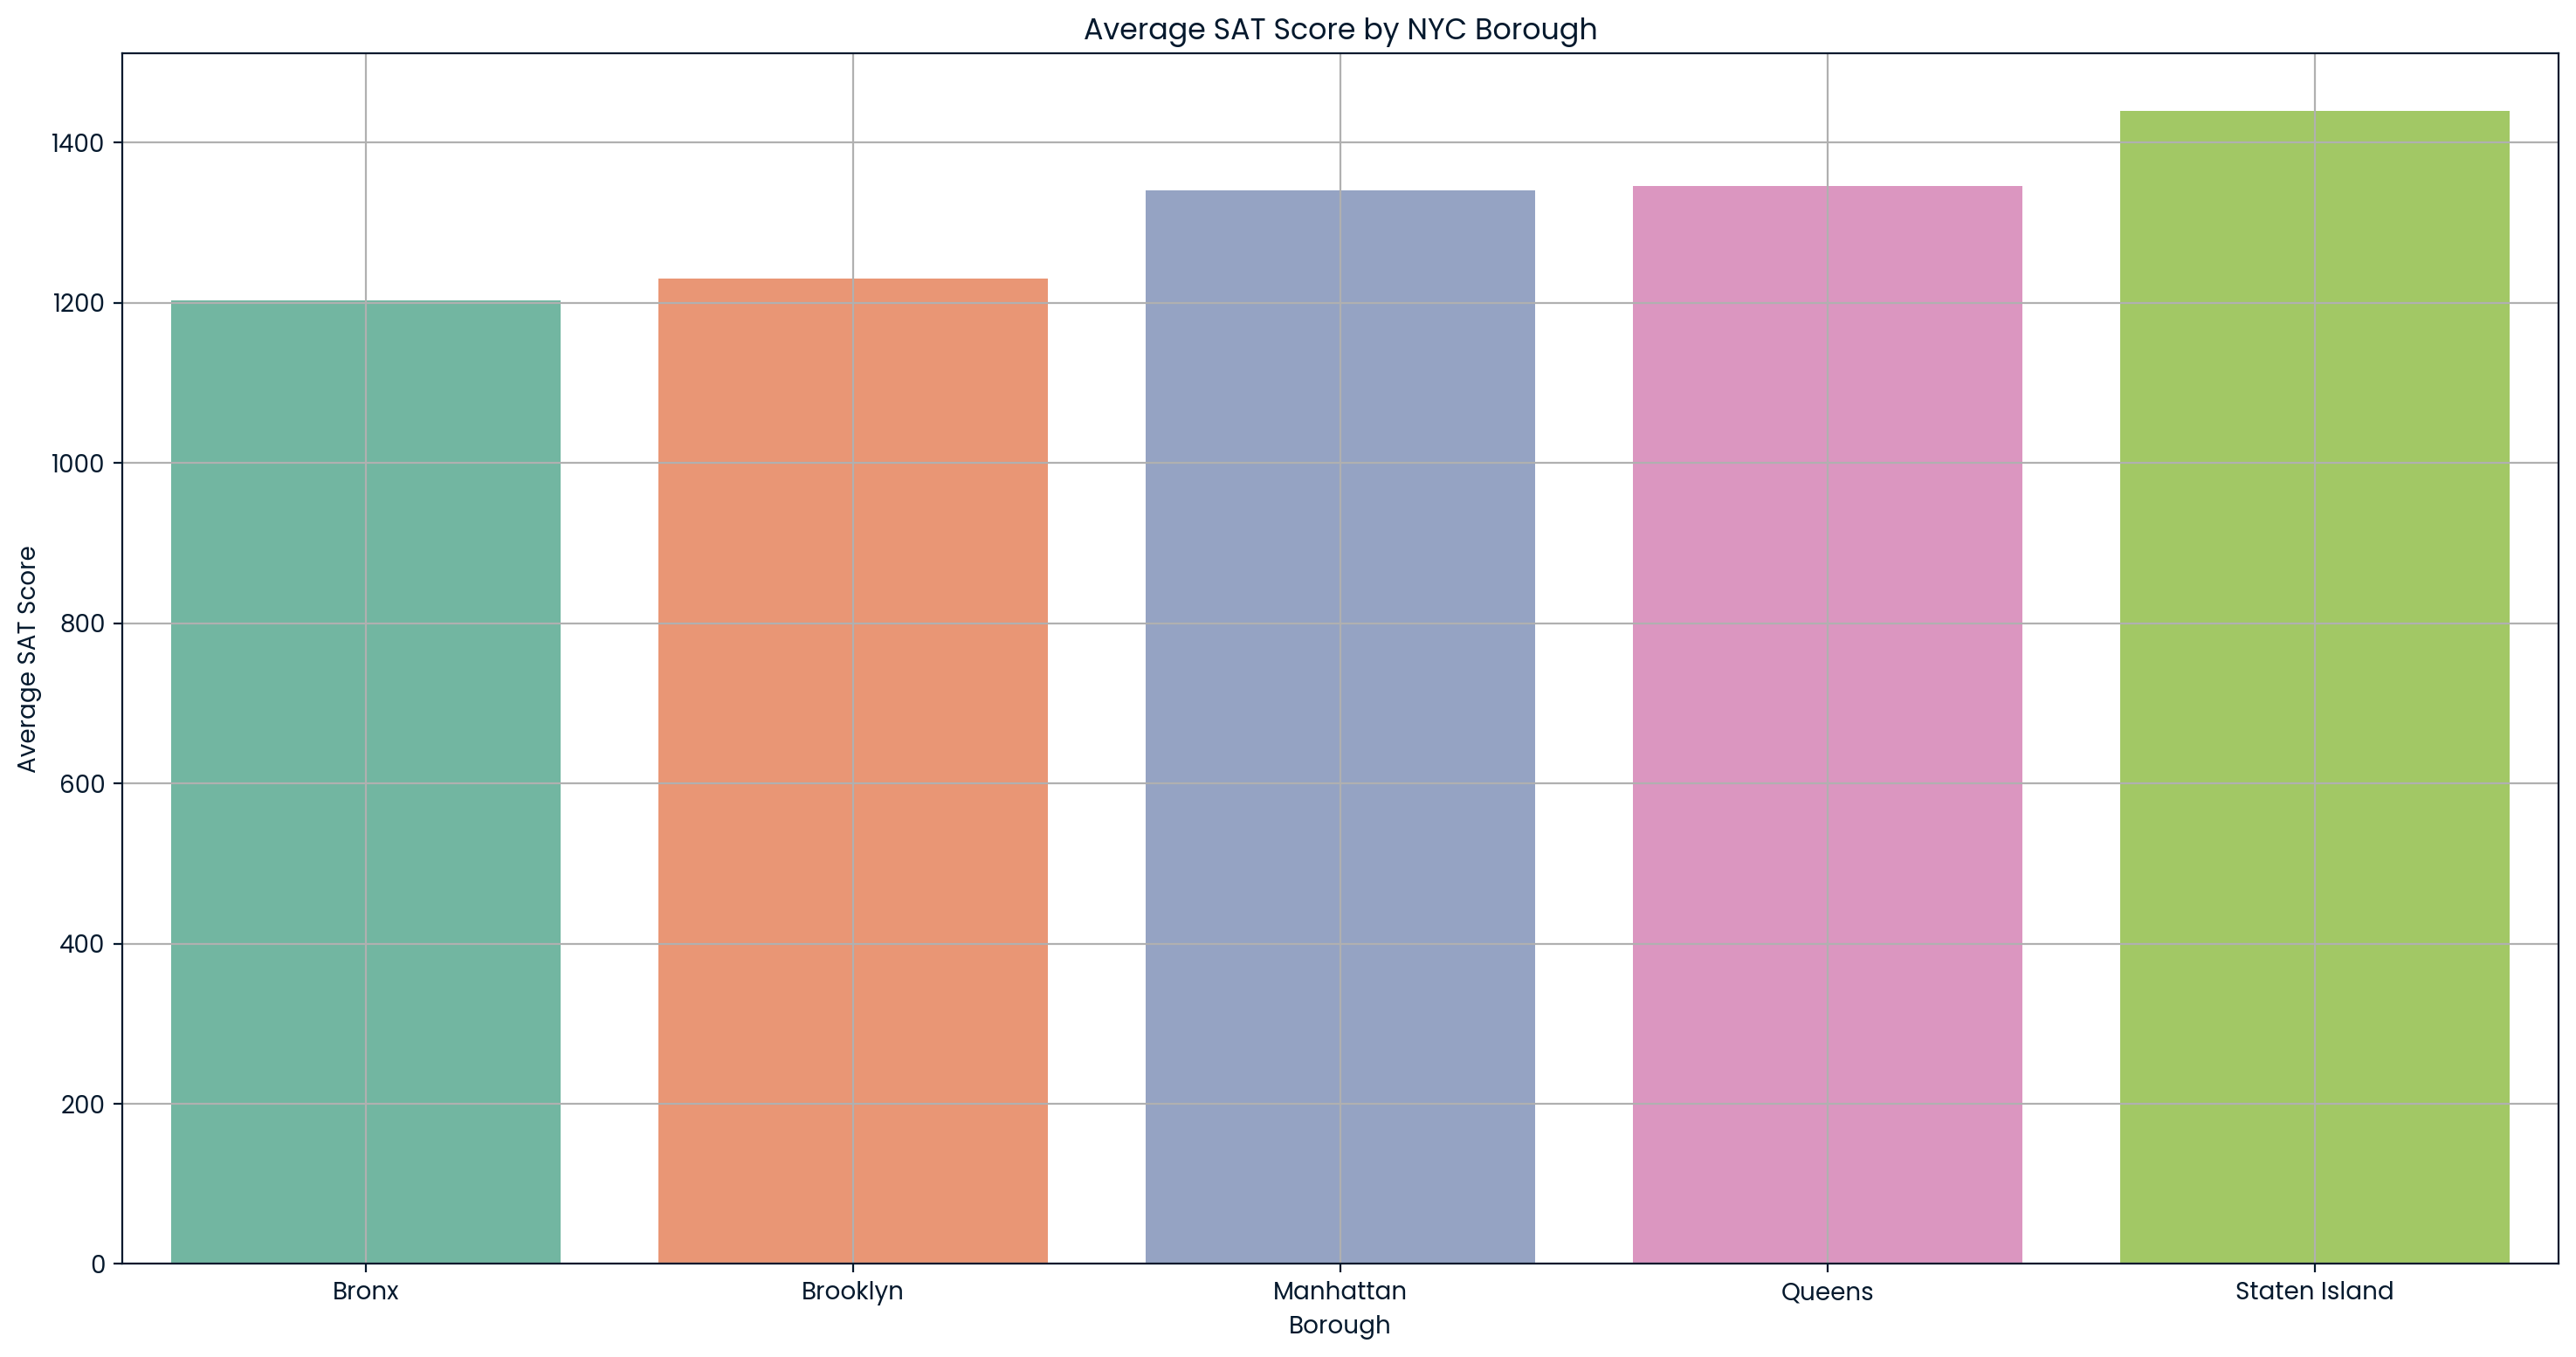

In [6]:
plt.figure(figsize=(18, 9))
sns.barplot(x='borough', y='average_SAT', data=borough_stats, palette='Set2')
plt.title('Average SAT Score by NYC Borough')
plt.xlabel('Borough')
plt.ylabel('Average SAT Score')
plt.grid(True)
plt.show()

**Visuaization: Standard Deviation of SAT Scores by Borough**

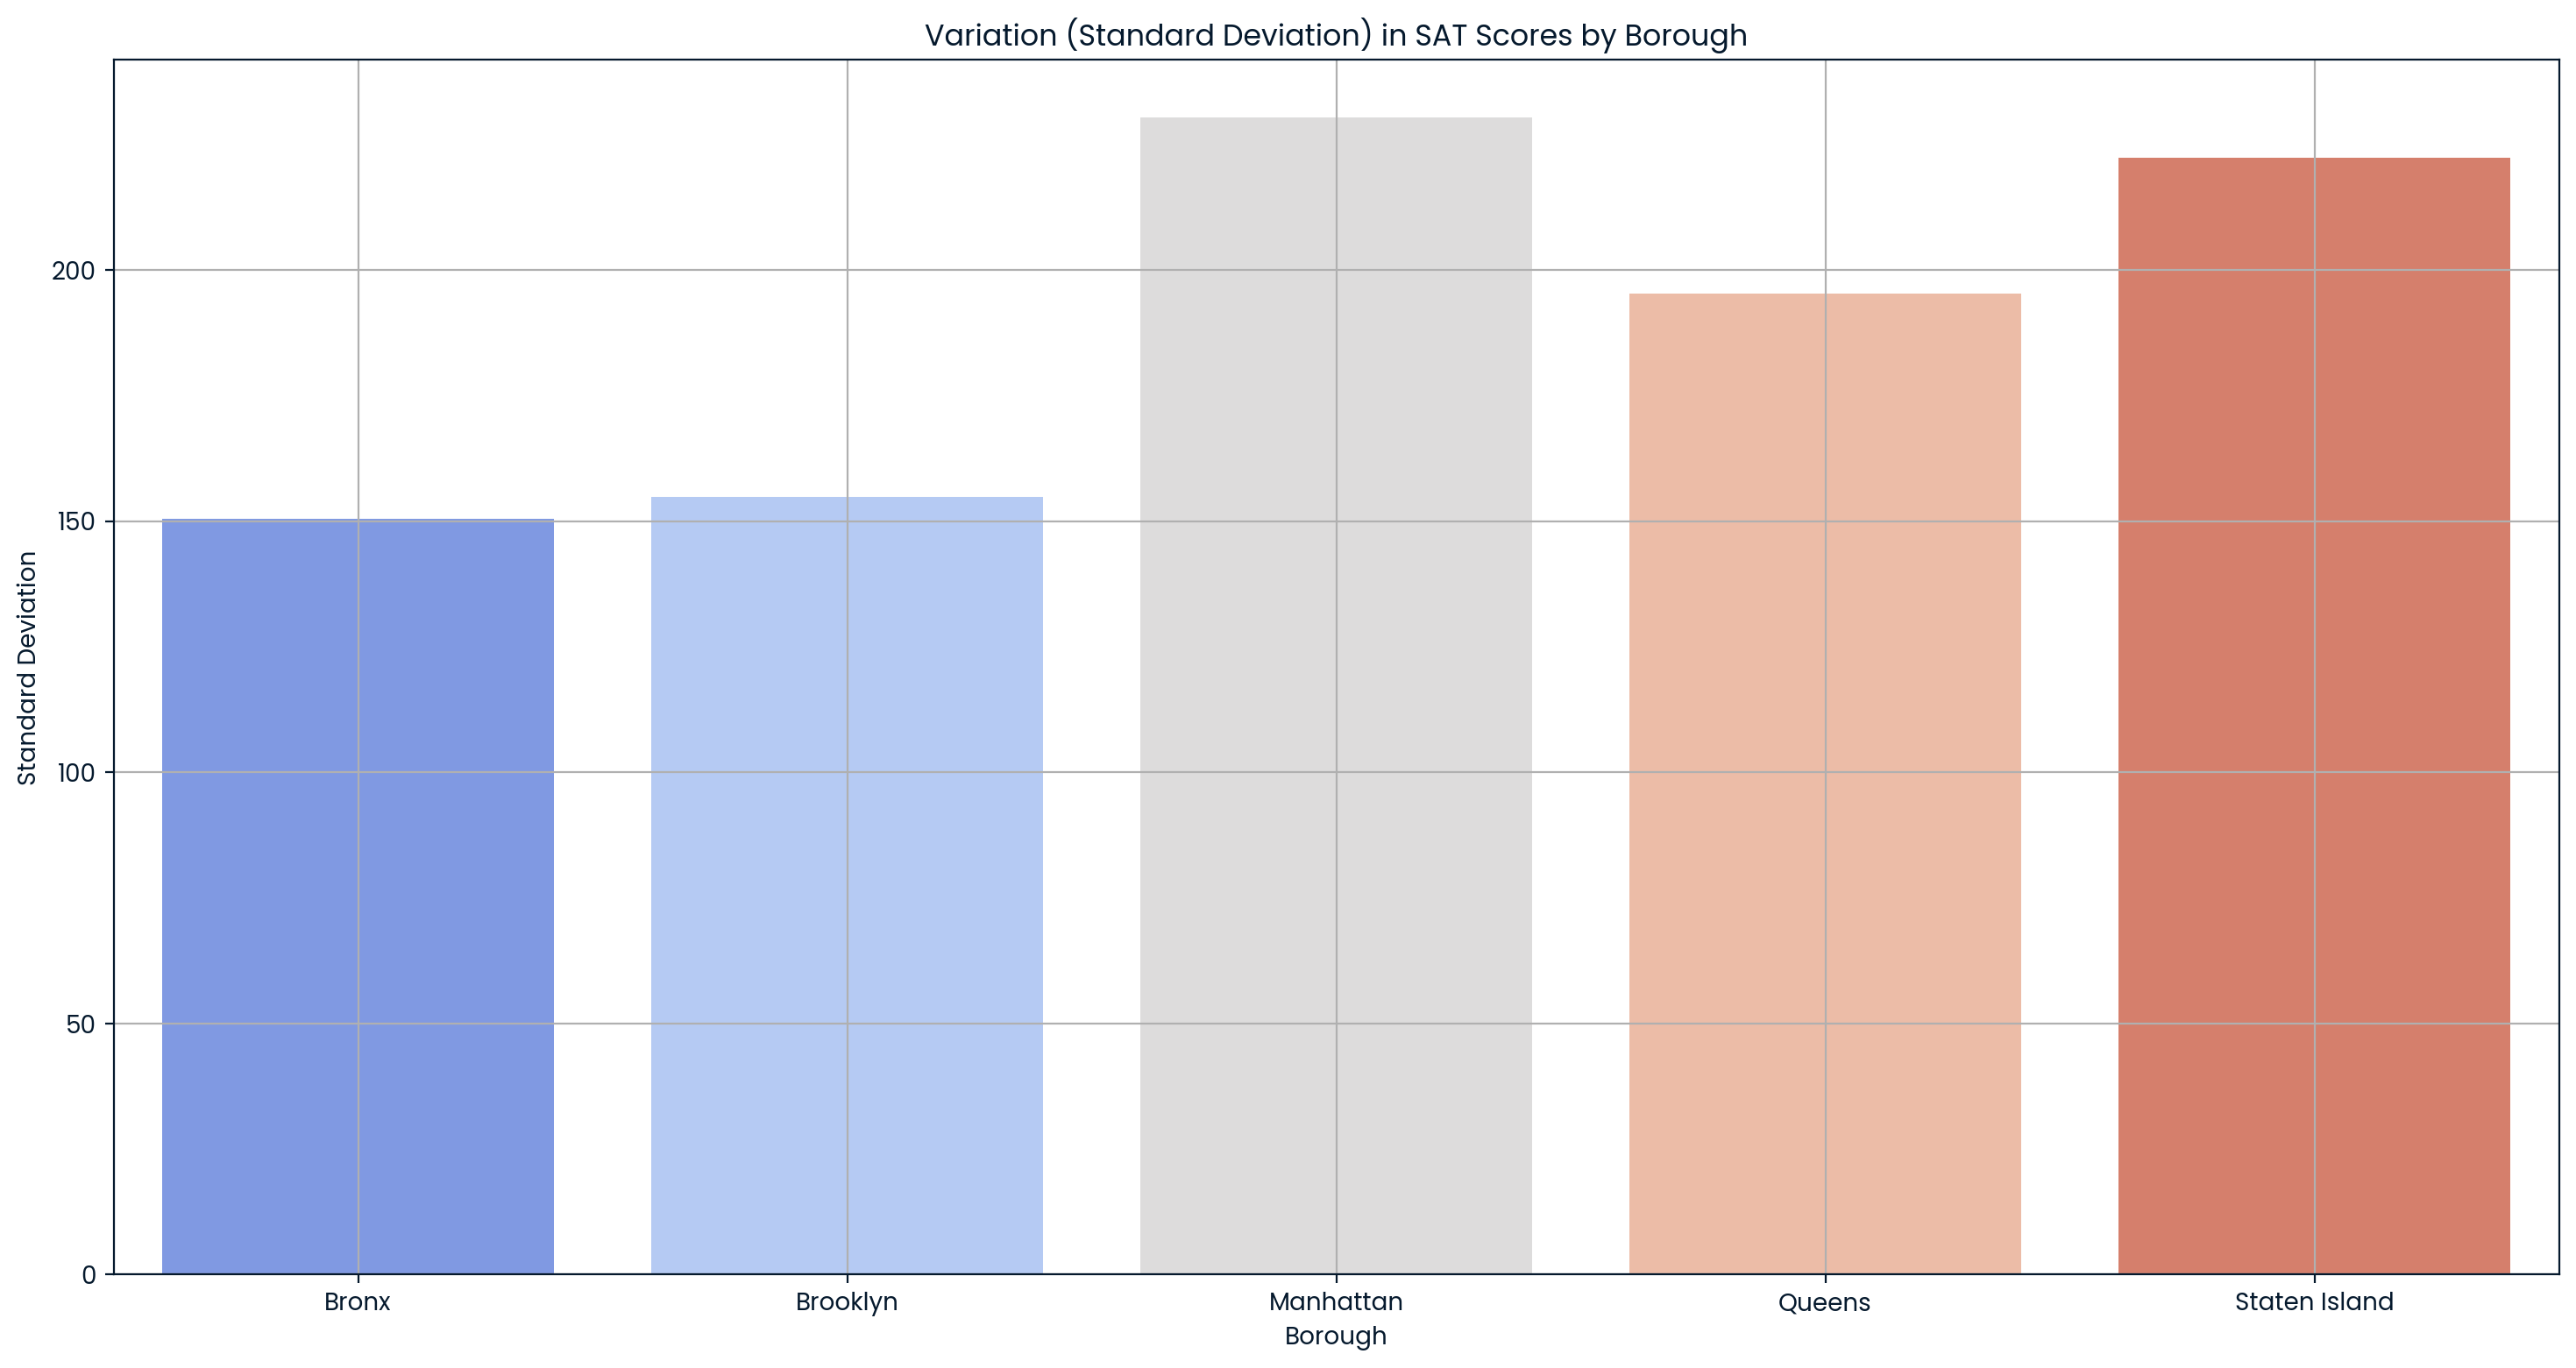

In [7]:
plt.figure(figsize=(18, 9))
sns.barplot(x='borough', y='std_SAT', data=borough_stats, palette='coolwarm')
plt.title('Variation (Standard Deviation) in SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()